In [13]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

In [14]:
# 载入数据
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
X = cancer.data
y = cancer.target
print('data shape: {0}; no. positive: {1}; no. negative: {2}'.format(
    X.shape, y[y==1].shape[0], y[y==0].shape[0]))

data shape: (569, 30); no. positive: 357; no. negative: 212


In [15]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

## 高斯核函数

In [16]:
from sklearn.svm import SVC

clf = SVC(C=1.0, kernel='rbf', gamma=0.1)
clf.fit(X_train, y_train)
train_score = clf.score(X_train, y_train)
test_score = clf.score(X_test, y_test)
print('train score: {0}; test score: {1}'.format(train_score, test_score))

SVC(gamma=0.1)

train score: 1.0; test score: 0.5964912280701754


best param: {'gamma': 0.00011379310344827585}
best score: 0.9367334264865704


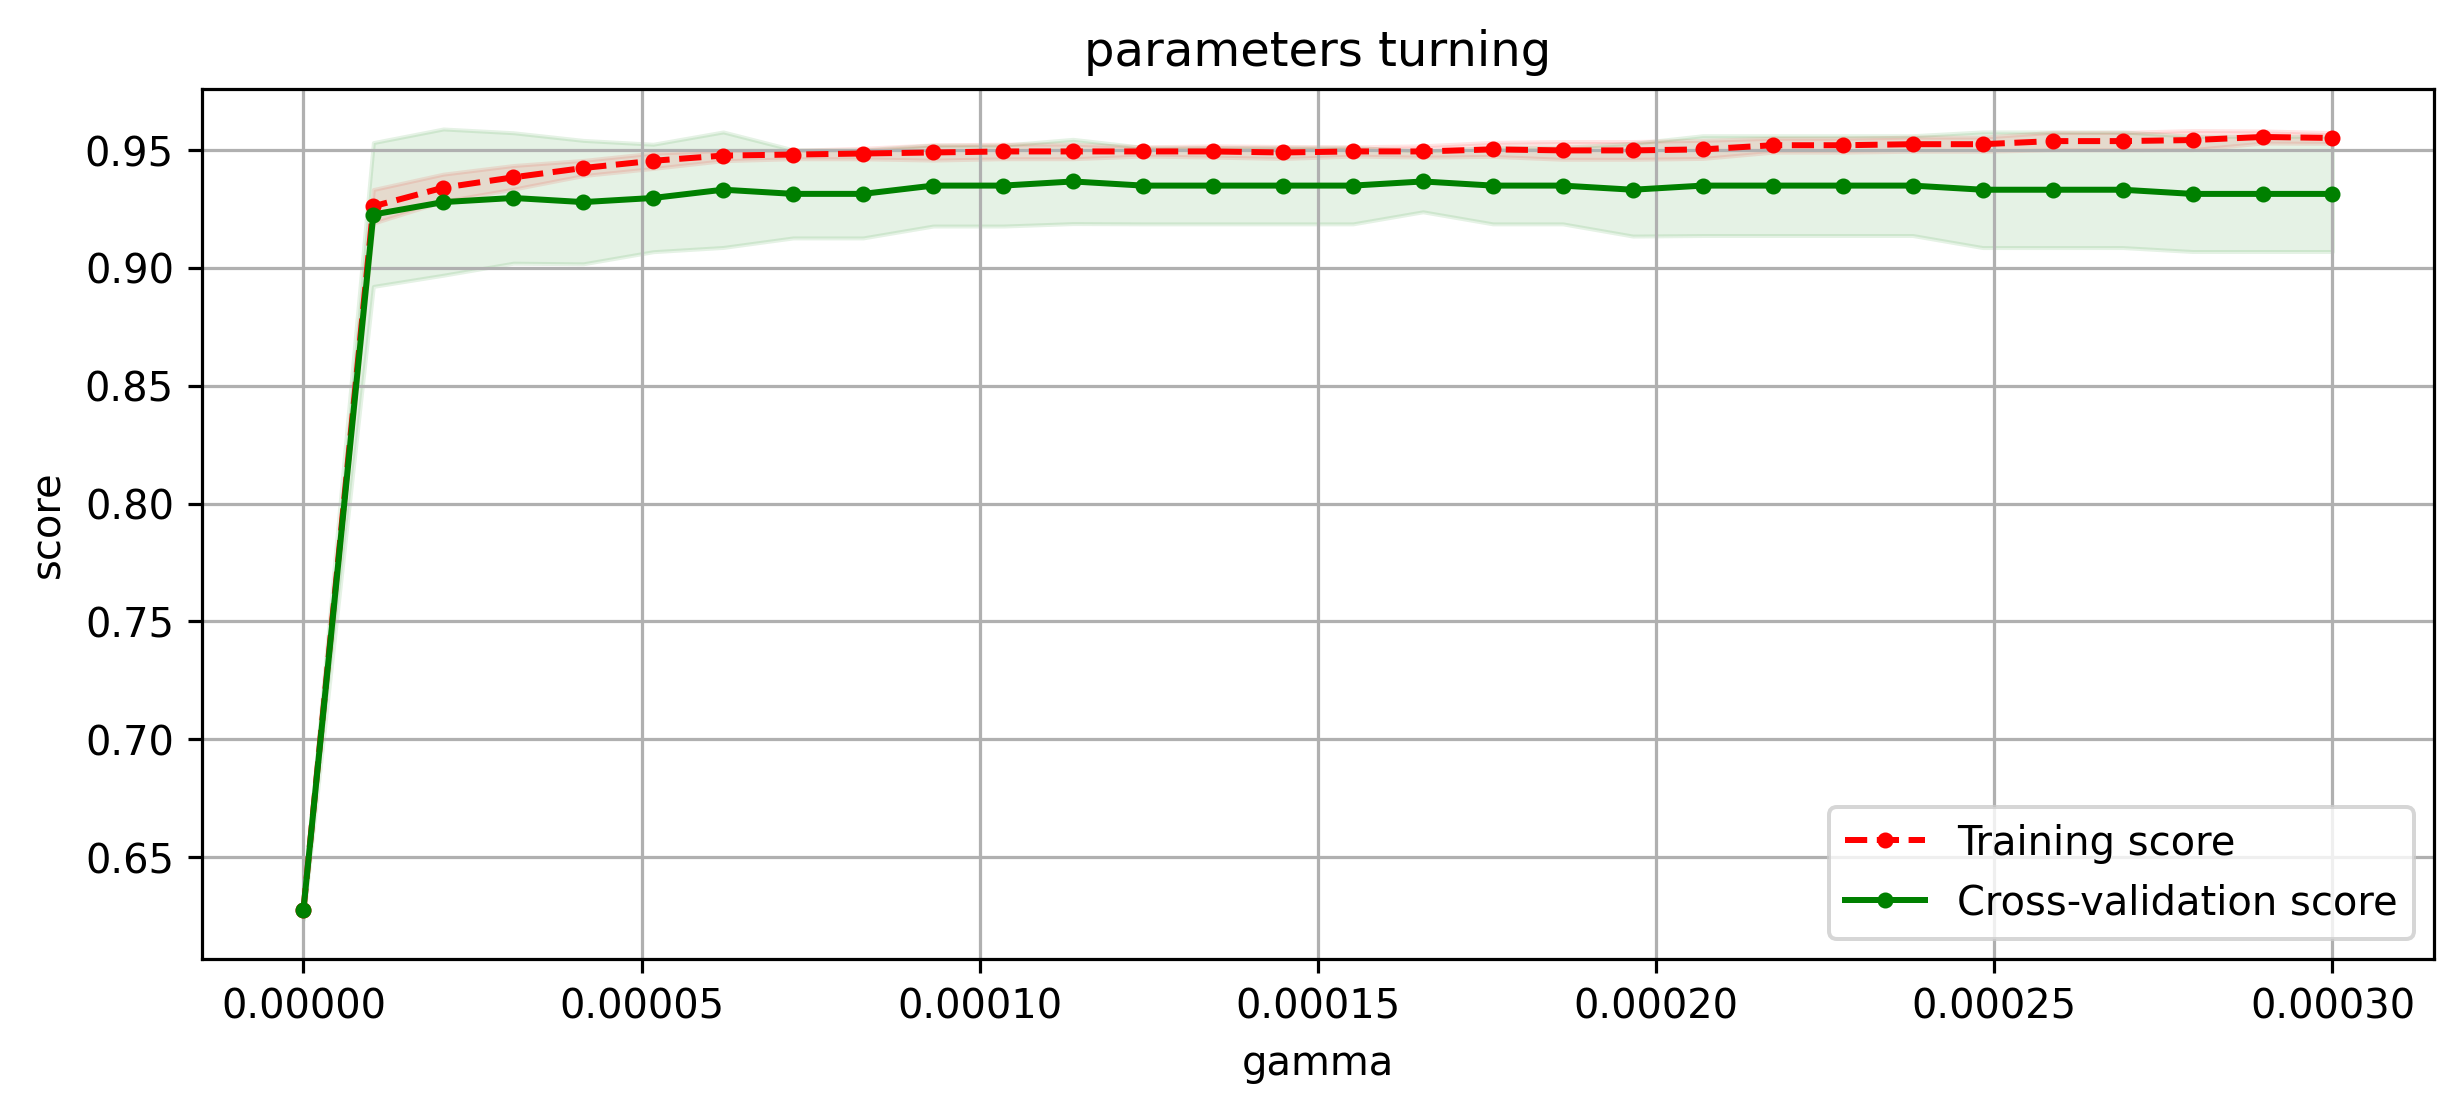

In [17]:
from common.utils import plot_param_curve
from sklearn.model_selection import GridSearchCV

gammas = np.linspace(0, 0.0003, 30)
param_grid = {'gamma': gammas}
clf = GridSearchCV(SVC(), param_grid, cv=5, return_train_score=True)
clf.fit(X, y)
print("best param: {0}\nbest score: {1}".format(clf.best_params_,
                                                clf.best_score_))
plt.figure(figsize=(10, 4), dpi=144)
plot_param_curve(plt, gammas, clf.cv_results_, xlabel='gamma');

<Figure size 1440x576 with 0 Axes>

<module 'matplotlib.pyplot' from '/Users/kamidox/work/books/ml-scikit-learn/code/.venv/lib/python3.10/site-packages/matplotlib/pyplot.py'>

elaspe: 0.431544


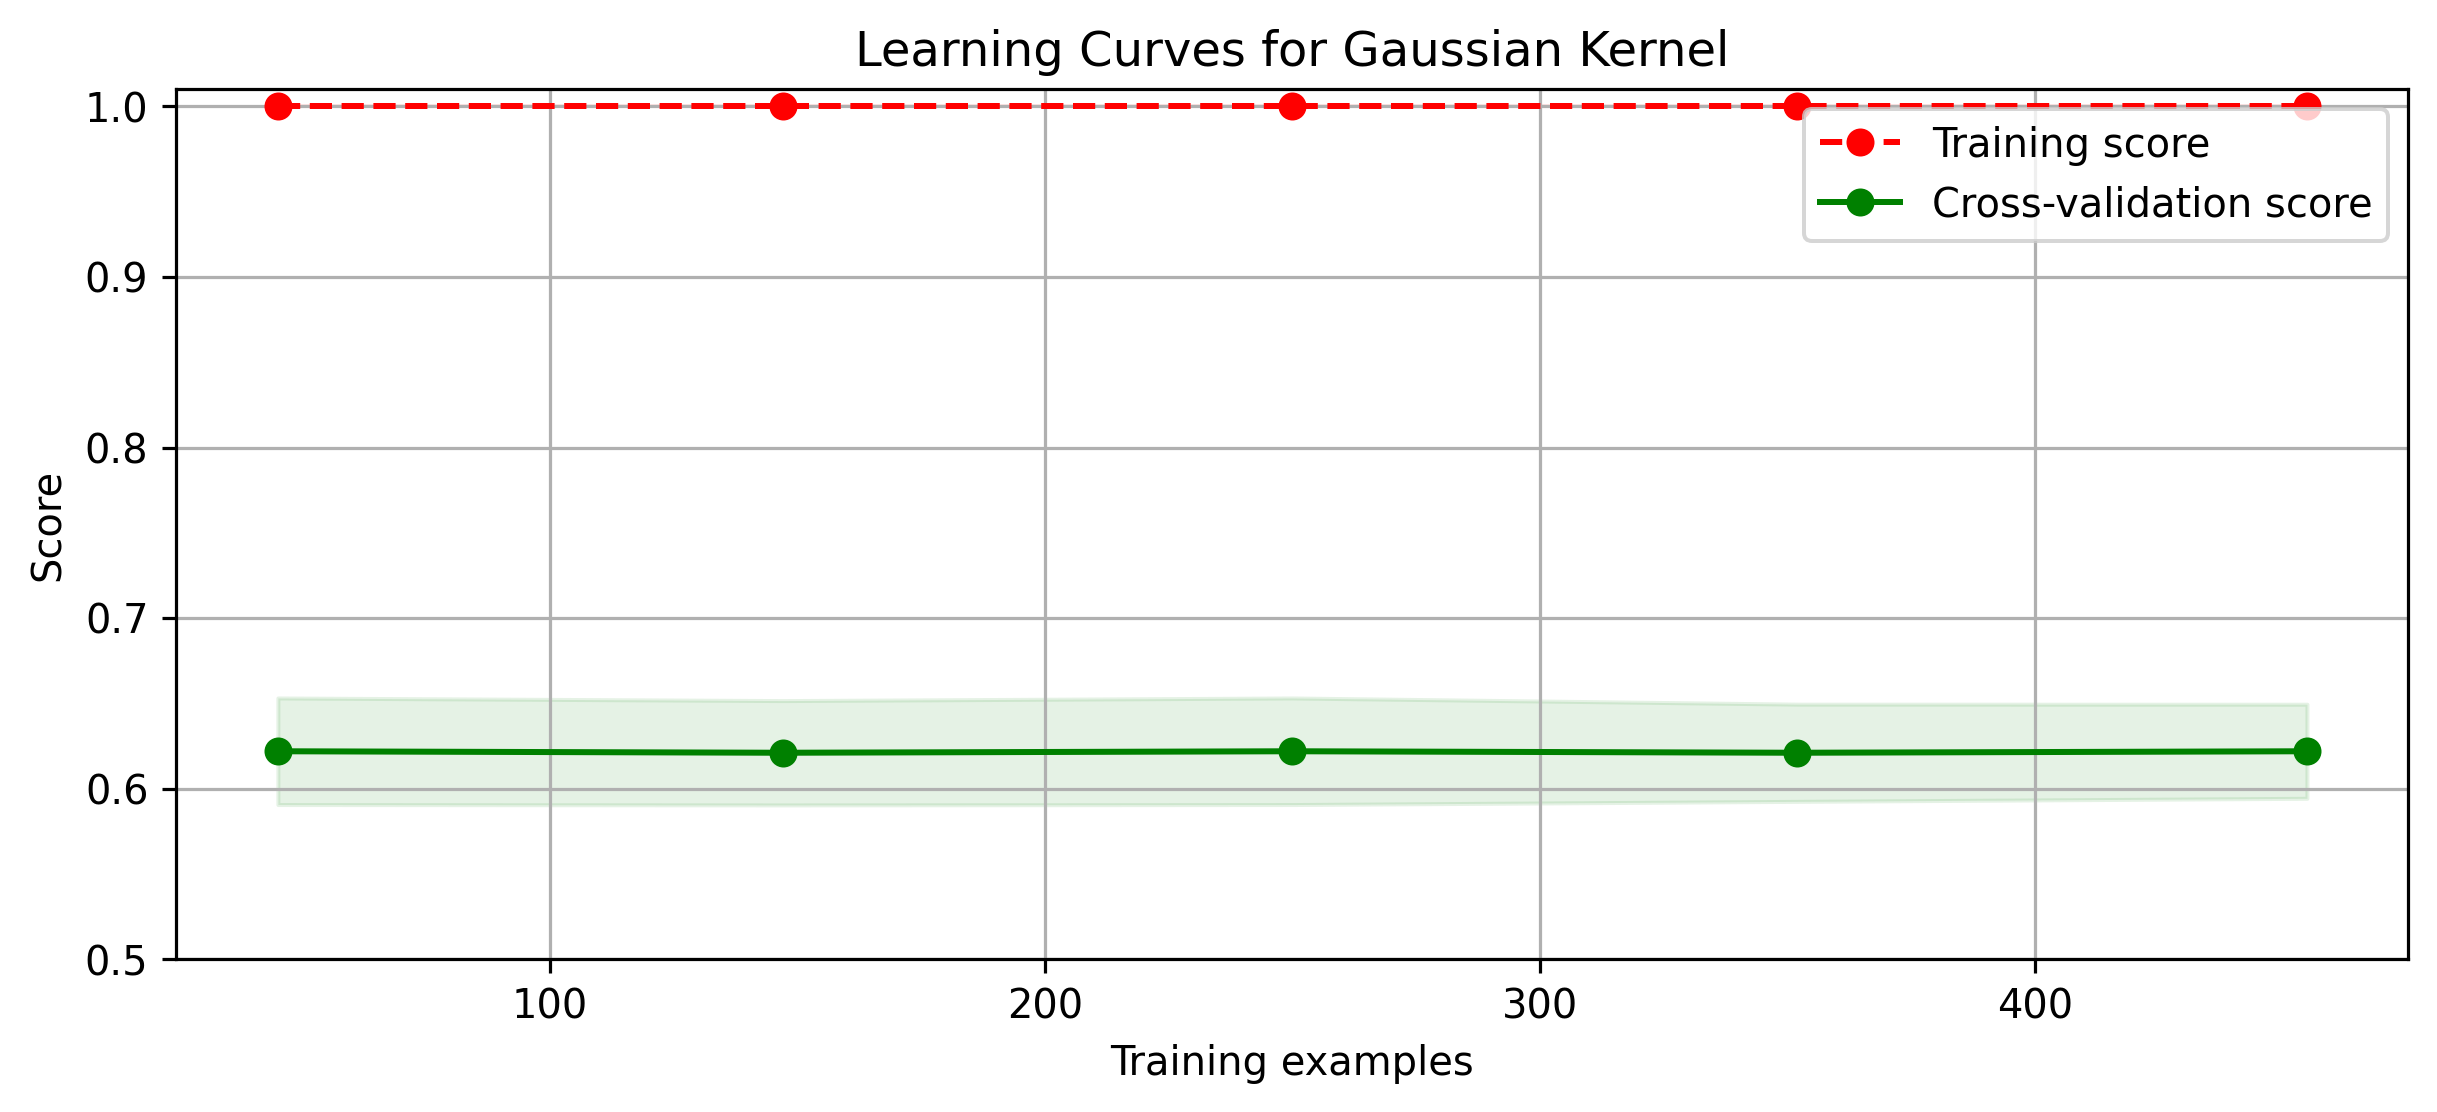

In [18]:
import time
from common.utils import plot_learning_curve
from sklearn.model_selection import ShuffleSplit

cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)
title = 'Learning Curves for Gaussian Kernel'

start = time.time()
plt.figure(figsize=(10, 4), dpi=144)
plot_learning_curve(plt, SVC(C=1.0, kernel='rbf', gamma=0.01),
                    title, X, y, ylim=(0.5, 1.01), cv=cv)

print('elaspe: {0:.6f}'.format(time.time()-start))

## 多项式核函数

In [19]:
from sklearn.svm import SVC

clf = SVC(C=1.0, kernel='poly', degree=2)
clf.fit(X_train, y_train)
train_score = clf.score(X_train, y_train)
test_score = clf.score(X_test, y_test)
print('train score: {0}; test score: {1}'.format(train_score, test_score))

SVC(degree=2, kernel='poly')

train score: 0.9186813186813186; test score: 0.868421052631579


<Figure size 1728x576 with 0 Axes>

<AxesSubplot:>

<module 'matplotlib.pyplot' from '/Users/kamidox/work/books/ml-scikit-learn/code/.venv/lib/python3.10/site-packages/matplotlib/pyplot.py'>

<AxesSubplot:>

<module 'matplotlib.pyplot' from '/Users/kamidox/work/books/ml-scikit-learn/code/.venv/lib/python3.10/site-packages/matplotlib/pyplot.py'>

elaspe: 0.073652


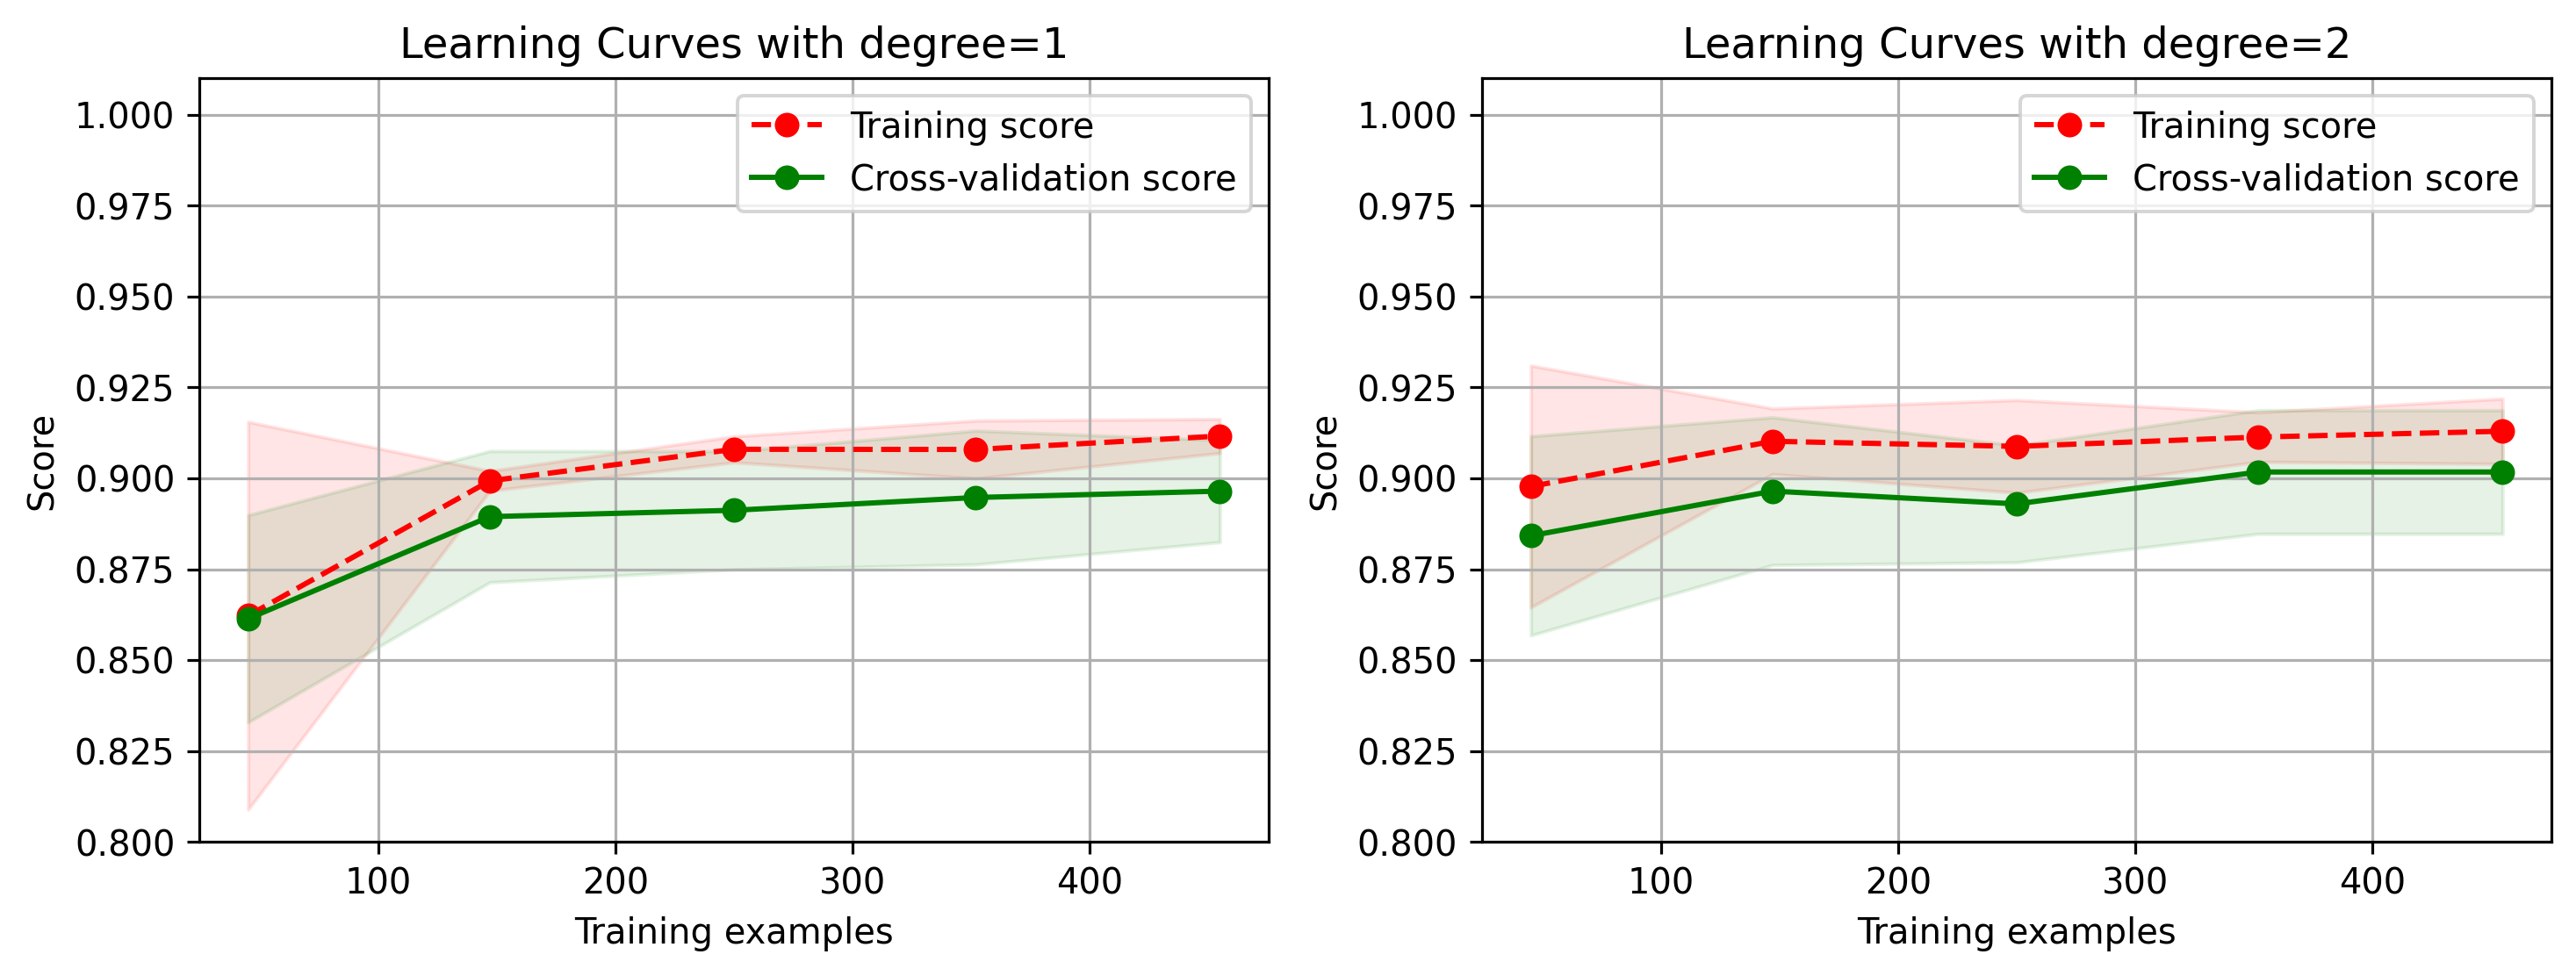

In [20]:
import time
from common.utils import plot_learning_curve
from sklearn.model_selection import ShuffleSplit

cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
title = 'Learning Curves with degree={0}'
degrees = [1, 2]

start = time.time()
plt.figure(figsize=(12, 4), dpi=144)
for i in range(len(degrees)):
    plt.subplot(1, len(degrees), i + 1)
    plot_learning_curve(plt, SVC(C=1.0, kernel='poly', degree=degrees[i]),
                        title.format(degrees[i]), X, y, ylim=(0.8, 1.01), cv=cv, n_jobs=4)

print('elaspe: {0:.6f}'.format(time.time()-start))

## 多项式 LinearSVC

In [21]:
from sklearn.svm import LinearSVC
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline

def create_model(degree=2, **kwarg):
    polynomial_features = PolynomialFeatures(degree=degree,
                                             include_bias=False)
    scaler = MinMaxScaler()
    linear_svc = LinearSVC(**kwarg)
    pipeline = Pipeline([("polynomial_features", polynomial_features),
                         ("scaler", scaler),
                         ("linear_svc", linear_svc)])
    return pipeline


clf = create_model(penalty='l1', dual=False, max_iter=5000)
clf.fit(X_train, y_train)
train_score = clf.score(X_train, y_train)
test_score = clf.score(X_test, y_test)
print('train score: {0}; test score: {1}'.format(train_score, test_score))

Pipeline(steps=[('polynomial_features', PolynomialFeatures(include_bias=False)),
                ('scaler', MinMaxScaler()),
                ('linear_svc',
                 LinearSVC(dual=False, max_iter=5000, penalty='l1'))])

train score: 0.9824175824175824; test score: 0.9912280701754386


<Figure size 1728x576 with 0 Axes>

<AxesSubplot:>

<module 'matplotlib.pyplot' from '/Users/kamidox/work/books/ml-scikit-learn/code/.venv/lib/python3.10/site-packages/matplotlib/pyplot.py'>

<AxesSubplot:>

<module 'matplotlib.pyplot' from '/Users/kamidox/work/books/ml-scikit-learn/code/.venv/lib/python3.10/site-packages/matplotlib/pyplot.py'>

elaspe: 0.989921


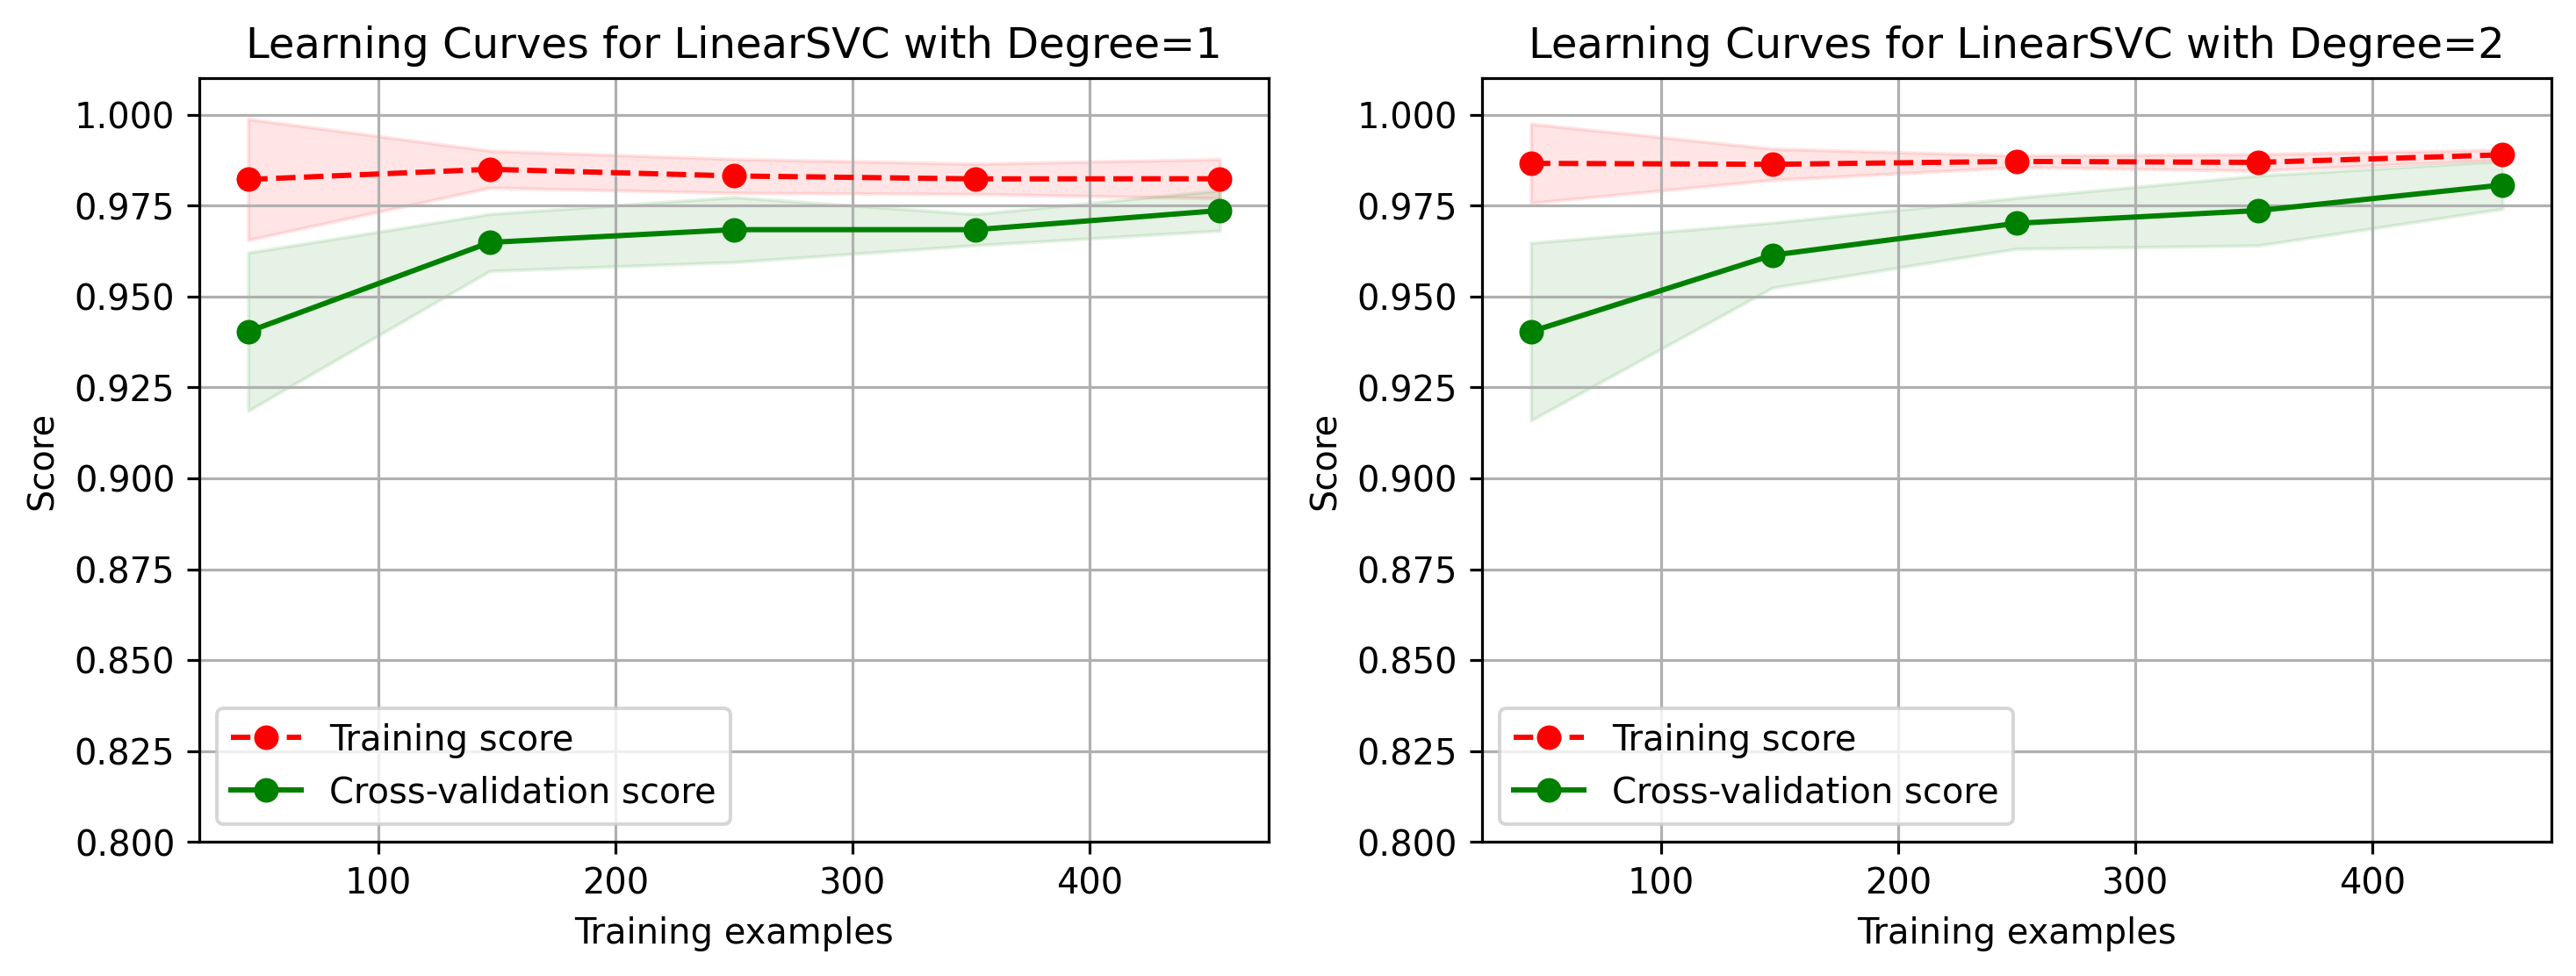

In [22]:
import time
from common.utils import plot_learning_curve
from sklearn.model_selection import ShuffleSplit

cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
title = 'Learning Curves for LinearSVC with Degree={0}'
degrees = [1, 2]

start = time.time()
plt.figure(figsize=(12, 4), dpi=144)
for i in range(len(degrees)):
    plt.subplot(1, len(degrees), i + 1)
    plot_learning_curve(plt, create_model(penalty='l1', dual=False, degree=degrees[i], max_iter=5000),
                        title.format(degrees[i]), X, y, ylim=(0.8, 1.01), cv=cv)

print('elaspe: {0:.6f}'.format(time.time()-start))